<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
    <img style="float: right; padding-right: 10px; width: 65px" src="https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/clemson_paw.png"> 
</div>

# Week 12 | Lab: Feed Forward Neural Networks

**Clemson University** </br>
**Instructor(s):** Tim Ransom </br>

------------------------------------------------------------------------
## Learning objectives

- Describe the architecture of a Feed-Forward Neural Network (FFNN).
- Design a simple FFNN and fit it to a toy dataset.
- Write a loss function to quantify the performance of an FFNN.
- Implement the forward pass through an FFNN with a single hidden layer.
- Utilize TensorFlow and Keras to design and train an FFNN.

In [ ]:
""" RUN THIS CELL TO GET THE RIGHT FORMATTING """
import requests
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/css/cpsc6300.css'
styles = requests.get(css_file).text
HTML(styles)

**The goal of this lab is to be familiar with the most basic Artificial Neural Network architecture the `Feed-Forward Neural Network (FFNN)`.** 

In this lab, we will: 
  
1. Review the FFNN *anatomy*.
2. Design a simple FFNN from the scratch and fit simple toy-datasets.
3. Quantify the prediction (fit) by writing a loss function.
4. Write a function for the forward pass through an FFNN with a single hidden layer of arbitrary number of hidden neurons.
4. Use TensorFlow and Keras to design the previous architectures. 
5. Use TensorFlow and Keras to train the network (find the optimal network parameters). 

#### Import packages and check the version of your TensorFlow, it should be the version >2.0.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
print(tf.__version__)

---------
## 1 - Review of the ANN *anatomy*  

#### Input, Hidden, and Output layers

The **forward** pass through an FFNN  is  a sequence of linear (affine) and nonlinear (activation) operations. 

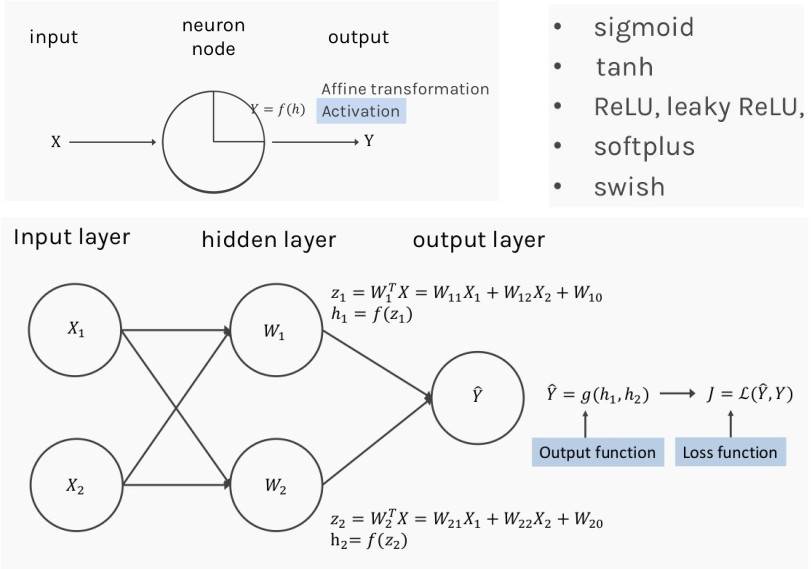


## 2 - Design a Feed Forward neural network


Let's create a simple FFNN  with one input,  one linear  neuron as output layer, and one hidden layer of arbitrary number of hidden neurons. Get familiar with the forward propagation.
- Define a nonlinear function which will be used for activation. 
- Create an **FFNN** with one hidden neuron and get familiar with your activation function.
- Load the `data/toyDataSet_1.csv` and try to fit. 
- Quantify the fitting by using a loss function.
- Make a general function for the forward pass of an FFNN with  one hidden layer of arbitrary number of hidden neurons. Always keep one input and one output. The output is a linear layer (affine transformation).
- Load the `data/toyDataSet_1.csv`. Design an FFNN with one hidden neurons and fit.
- Load the `data/toyDataSet_2.csv`. Design an FFNN with two hidden neurons and fit.

## Define the activation function
Here, we use the *Rectified Linear Unit*  (ReLU) function which is defined as $$g(x)=\max(0,x)$$

In [ ]:
def g(z: float) -> float :
    return  np.maximum(0, z)

# or 
# g = lambda z: np.maximum(0, z)

### Build a FFNN with one hidden neuron

In [ ]:
# input vector
x_train = np.linspace(-1,1,100)

# set the network parameters
w1 = 1
b1 = 0.0
w2  = 1
b2  = 0.0 

# affine operation
l1 = w1 * x_train + b1

# activation
h = g(l1)

# output linear layer
y_train = w2 * h + b2


plt.plot(x_train, y_train,'-b' );

#### Plot a few cases to understand

In [ ]:
plt.figure(figsize=[12,8])

plt.subplot(2,2,1)
w1,b1,w2,b2 = 1,0,1,0
l1 = w1*x_train + b1
y_train = w2*g(l1)+b2
plt.plot(x_train,y_train,'b')
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.title('w1, b1, w2, b2 = '+ str(w1) + ', ' + str(b1)+ ', '+ str(w2) + ', ' + str(b2))
plt.grid('on')
#

plt.subplot(2,2,2)
w1,b1,w2,b2 = 1, 0.5, 1,0
l1 = w1*x_train + b1
y_train = w2*g(l1)+b2
plt.plot(x_train,y_train,'b')
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.title('w1, b1, w2, b2 = '+ str(w1) + ', ' + str(b1)+ ', '+ str(w2) + ', ' + str(b2))
plt.grid('on')

#
plt.subplot(2,2,3)
w1,b1,w2,b2 = 1,0.5, 1, -0.5
l1 = w1*x_train + b1
y_train = w2*g(l1)+b2
plt.plot(x_train,y_train,'b')
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.title('w1, b1, w2, b2 = '+ str(w1) + ', ' + str(b1)+ ', '+ str(w2) + ', ' + str(b2))
plt.grid('on')

#
plt.subplot(2,2,4)
w1,b1,w2,b2 = 1, 0.5, 2, -.5
l1 = w1*x_train + b1
y_train = w2*g(l1)+b2
plt.plot(x_train,y_train,'b')
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.title('w1, b1, w2, b2 = '+ str(w1) + ', ' + str(b1)+ ', '+ str(w2) + ', ' + str(b2))
plt.grid('on')
plt.tight_layout()


<div class="exercise"><b>Exercise 1: Fit the data.</b></div>

- Load the `toyDataSet_1.csv` from the `/data` directory into pandas dataframe named `toySet_1`. 
- Fit the data with the above simple FFNN and plot your results.

1. **Load the Dataset**:
   - Load the `data/toyDataSet_1.csv` dataset into a Pandas DataFrame called `toySet_1`.
   - Extract the `x` and `y` columns as input and output arrays (`x_train` and `y_train`), reshaped to 2D arrays.

2. **Activation Function**:
   - Use the Rectified Linear Unit (ReLU) function $g(z) = \max(0, z)$.

3. **Set Network Parameters**:
   - Define the network parameters:
     - Hidden layer: Weight $w_1 = 2$, Bias $ b_1 = 0.0 $. Use variables `w1` and `b1` for weight and bias.
     - Output layer: Weight $ w_2 = 1 $, Bias $ b_2 = 0.5 $. Use variables `w2` and `b2` for weight and bias.

4. **Perform the Forward Pass following code in previous cells.**:
   - **Step 1**: Apply the affine transformation for the hidden layer:
     $ l_1 = w_1 \cdot x_{\text{train}} + b_1 $
     ```python
        # affine operation
        l1 = w1 * x_train + b1
     ```   
   - **Step 2**: Apply the ReLU activation function:
     $ h = g(l_1) $
   - **Step 3**: Apply the affine transformation for the output layer:
     $ y_{\text{model}} = w_2 \cdot h + b_2 $
     ```python
        # output linear layer
        y_model = w2 * h + b2
     ```

5. **Plot the Results**:
   - Plot the ground truth data points (`x_train`, `y_train`) as red dots.
   - Plot the FFNN predicted values (`y_model`) as a blue line.


In [ ]:
"""Write your code for exercise 1 here:"""

# your code here
raise NotImplementedError

In [ ]:
####################################
###✅🔒 Hidden tests here ✅🔒### 
###################################

## Let's Write the Loss function
Quantify the quality of the fitting by writing a loss function. Mean Square Error (MSE) is a good choice for regression tasks.

In [ ]:
def mseLoss(y_data, y_prediction):    
    return ((y_data - y_prediction)**2).mean()

In [ ]:
Loss = mseLoss(y_train,y_model)
print('MSE Loss = ', Loss)

## Forward pass function
Let's write a function for the forward propagation through an FFNN with  one input, one linear output neuron, and one hidden layers with arbitrary number of neurons. 

General Scheme:
- One input vector: $x$
- Affine (linear) transformation with $w_{1},~b_{1}$  are the parameter vectors (or $w_{1i},~b_{1i}$):
$$l_1 = \sum_i^\text{neurons} w_{1i}x+b_{1i} = w^T_1 x + b_1  = w_1 \cdot x + b_1 = W_1\cdot X$$
- Activation (nonlinear transformation): $$h = g(l_1)$$
- Linear Output layer with a vector for weights $w_o$ and a scalar for the bias $b_o$: $$y = w_o^T h+b_o = w_o \cdot h + b_o = W_o\cdot H$$

In [ ]:
def myFFNN(X, W1, Wo ):

#     input dimensions  = 1
#     output dimensions = 1
#     hidden layers = 1
#     hidden neurons is determined by the size of W1 or W0
#     W1 : parameters of first layer 
#     Wo : parameters of output layer
#     parameters :  weights and biases


    # Input Layer: 
    # add a constant column for the biases to the input vector X
    ones = np.ones((len(X),1))
    l1 = X
    l1 = np.append(l1, ones, axis=1)

    # hidden layer: Affine and activation
    a1 = np.dot(W1, l1.T)
    h1 = g(a1)    
    
    # Output layer (linear layer) (2 steps)
    # (a) Add a const column the h1 for the affine transformation
    ones = np.ones((len(X),1))    
    
    H= np.append(h1.T, ones,axis=1).T
    # (b) Affine
    a = np.dot(Wo,H)
    y_hat = a.T

    return y_hat

#### Using the previous parameters in our forward propagation function to fit the toyDataSet_1.csv. Plot the resuts and print the associate loss function

In [ ]:
w11 = 2
b11 = 0.0
w21  = 1
b21  = 0.5

# make the parameters matrices
# First layer
W1 = np.array([[w11,b11]])
# Output Layer (only one bias term)
Wo = np.array([[w21,b21]])

# run the model
y_model_1 = myFFNN(x_train, W1, Wo )

# plot the prediction and the ground truth
plt.plot(x_train, y_train,'or',label='data')
plt.plot(x_train, y_model_1,'-b', label='FFNN' )
plt.legend();

# quantify your prediction
Loss_1 = mseLoss(y_train,y_model_1)
print('MSE Loss = ', Loss_1)

<div class="exercise"><b>Exercise 2: Fit a more complex dataset.</b></div>

- Load the `toyDataSet_2.csv` from the `/data` directory. 
- Fit the data with your FFNN function and plot your results.

1. **Load the Dataset**:
   - Load the `toyDataSet_2.csv` dataset from the `/data` directory into a Pandas DataFrame called `toySet_2`.
   - Extract the `x` and `y` columns as input and output arrays (`x_train2` and `y_train2`), reshaped to 2D arrays.

2. **Set Network Parameters**:
   - Define parameters for the hidden layer:
     - First neuron: Weight $ w_{11} = 1 $, Bias $ b_{11} = 0.25 $. Use variables `w11` and `b11` for weight and bias.
     - Second neuron: Weight $ w_{12} = -1 $, Bias $ b_{12} = 0.25 $. Use variables `w12` and `b12` for weight and bias.
   - Define parameters for the output layer:
     - Weights $ w_{21} = 1, w_{22} = 1 $.
     - Bias $ b_2 = -0.5 $.
     - Use variables `w21`, `w22` and `b2` for weights and bias respectively.

3. **Define the Network Structure**:
   - Use matrix representations for the parameters:
     - Hidden layer parameters:
       $
       W_1 = 
       \begin{bmatrix}
       w_{11} & b_{11} \\
       w_{12} & b_{12}
       \end{bmatrix}
       $
     - Output layer parameters:
       $
       W_o = [w_{21}, w_{22}, b_2]
       $

4. **Perform the Forward Pass**:
   - Use above predefined `myFFNN` function to run the forward pass:
     - Pass the input `x_train2` through the FFNN using the hidden layer (`W1`) and output layer (`Wo`).

5. **Plot the Results**:
   - Plot the ground truth data points (`x_train2`, `y_train2`) in red.
   - Plot the FFNN's predicted values (`y_model2`) in blue.

6. **Quantify the Model's Prediction**:
   - Use the predefined `mseLoss` function to calculate the Mean Squared Error (MSE) loss:
     $
     \text{Loss} = \text{mseLoss}(y_{\text{train2}}, y_{\text{model2}})
     $
   - Print the MSE loss value.

In [ ]:
"""Write your code for exercise 2 here:"""

# your code here
raise NotImplementedError

In [ ]:
####################################
###✅🔒 Hidden tests here ✅🔒### 
###################################

## More complicated function
Let's explore more complicated function that this simple network can fit by using more neurons. Essentially explore what function it can generate.

### Two Neurons

In [ ]:
# Two Neurons
w11 = -.8
b11 = -.1

w12 = .4
b12 = -.1

w21  = 1.3
w22  = -.8

b2  = 0.5

# First Layer
W1 = np.array([[w11,b11], [w12,b12]])
# Output Layer (only one bias term)
Wo = np.array([[w21,w22, b2]])


# run the model
y_model_p = myFFNN(x_train2, W1, Wo )

# plot the prediction and the ground truth
plt.plot(x_train2, y_model_p,'b', label='FFNN' );

### Three Neurons

In [ ]:
# Three Neurons
w11 = -.1
b11 = .3

w12 = .9
b12 = -.1

w13 = .7
b13 = -.2


w21  = -1.
w22  = -.7
w33  = .8

b2  = 0.25

# First Layer
W1 = np.array([[w11,b11], [w12,b12], [w13,b13]])
# Output Layer (only one bias term)
Wo = np.array([[w21,w22,w33, b2]])


# run the model
y_model_p = myFFNN(x_train2, W1, Wo )

# plot the prediction and the ground truth
plt.plot(x_train2, y_model_p,'b', label='FFNN' );



### Random numbers between a, b

In [ ]:
# Random numbers between a,b
# (b-a) * np.random.random_sample((4, 4)) + a
a = -20
b = 20

# N neurons
N = 50

# Create random parameter matrices
W1 = (b-a) * np.random.random_sample((N, 2)) + a
Wo = (b-a) * np.random.random_sample((1, N+1)) + a

# make a bigger interval
x_train_p2 = np.linspace(-2,2,1000)
x_train_p2= x_train_p2.reshape(-1,1)

# run the model
y_model_p2 = myFFNN(x_train_p2, W1, Wo )

# plot the prediction and the ground truth
plt.plot(x_train_p2, y_model_p2,'b', label='FFNN' );



-------------

## 3 - Tensor Flow and Keras

**Keras, Sequential:** [Source]
(https://keras.io/models/sequential/)


In the previous exercises, we manually constructed the architecture and performed a forward pass of a simple Feed-Forward Neural Network (FFNN). While this is useful to understand the inner workings, real-world problems often involve more complex models and large datasets. For such cases, frameworks like TensorFlow and Keras are extremely helpful.

**Why TensorFlow and Keras?**

`TensorFlow` is an open-source deep learning framework developed by Google. It is powerful, flexible, and widely used in both research and production.

`Keras` is a high-level API built on top of TensorFlow that simplifies the creation and training of neural networks. It allows you to quickly prototype and build deep learning models with minimal code.

Together, these tools allow you to:

- Build models using predefined layers and activation functions.

- Automatically compute gradients and update weights using backpropagation.

- Train models efficiently using built-in optimizers.

- Evaluate and visualize performance metrics like loss or accuracy.


Here, we use Tensor Flow (TF) and Keras to employ FFNN for regression tasks. 
- Use Keras to fit the toyDataSet_2 dataset. Tune the weights manually.
- Use  TF to find the optimal parameters for the same dataset. Train the FFNN by using backpropagation.

#### Import packages from keras

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

#### Read again the toyDataSet_2 and define again the  weights from exercise 2

In [ ]:
toySet_2 = pd.read_csv('data/toyDataSet_2.csv')

x_train2 = toySet_2['x'].values.reshape(-1,1)
y_train2 = toySet_2['y'].values.reshape(-1,1)

plt.plot(x_train2, y_train2,'.r',label='data')

## 3.1 Build and Set Weights Manually

Let's start by constructing a simple FFNN in Keras and manually setting the weights to replicate a model we previously built from scratch:

- Using `Sequential` API to define a model.
- Using `Dense layers` with specified activation functions.
- Setting weights using model.set_weights() to match those used in earlier exercises.
- Predict with model.predict() and calculate the loss using mseLoss().

In [ ]:
# weights from exercise 2
w11 = 1
b11 = .25

w12 = -1
b12 = .25

w21  = 1
w22  = 1

b2  = -0.5

#### Using TensorFlow and Keras to make a FFNN to fit the toyDataSet_2. Using the same architecture and weights as previously

In [ ]:
model = models.Sequential(name='My_two_neurons_model_fixedWeights')

# hidden layer with 2 neurons (or nodes)
model.add(layers.Dense(2, activation='relu', input_shape=(1,)))

# output layer, one neuron 
model.add(layers.Dense(1,  activation='linear'))

model.summary()

#### Manually set the parameters

In [ ]:
# get weights 
weights = model.get_weights()
print('Initial values of the parameters')
print(weights)

# hidden layer
weights[0][0]=np.array([ w11, w12]) #weights 
weights[1]=np.array([b11, b12]) # biases
# output layer 
weights[2]=np.array([[w21],[w22]]) # weights
weights[3] = np.array([b2])    # bias

model.set_weights(weights)

print('\nAfter setting the parameters')
print(weights)

#### Visualize and quantify the prediction

In [ ]:
y_model_tf1 = model.predict(x_train2)

# plot the prediction and the ground truth
plt.plot(x_train2, y_train2,'or',label='data')
plt.plot(x_train2, y_model_tf1,'-b', label='FFNN' )
plt.legend()

# quantify your prediction
Loss_tf1 = mseLoss(y_train2, y_model_tf1)
print('MSE Loss = ', Loss_tf1)

## 3.2 Let TensorFlow Train the Network (Backpropagation)
#### Let TensorFlow to find the optimal weights

- Instead of manually tuning weights, we let TensorFlow optimize them using backpropagation, powered by automatic differentiation.

- Backpropagation is a training procedure that:

- It uses the chain rule of calculus to compute gradients of the loss function with respect to each parameter.

- Then iteratively updates parameters to minimize the loss.

> **Key Training Concepts:**</br>
`Epoch:` One complete pass through the entire dataset.</br>
`Batch Size:` Number of samples processed before the model updates its weights.</br>
`Stochastic Gradient Descent (SGD):` An optimization algorithm that updates parameters using small batches of data. This can help escape local minima and speed up training.

#### Back propagation

The **backward** pass is the training. It is based on chain rule and updates the parameters. The optimization is done by minimizing the loss function.

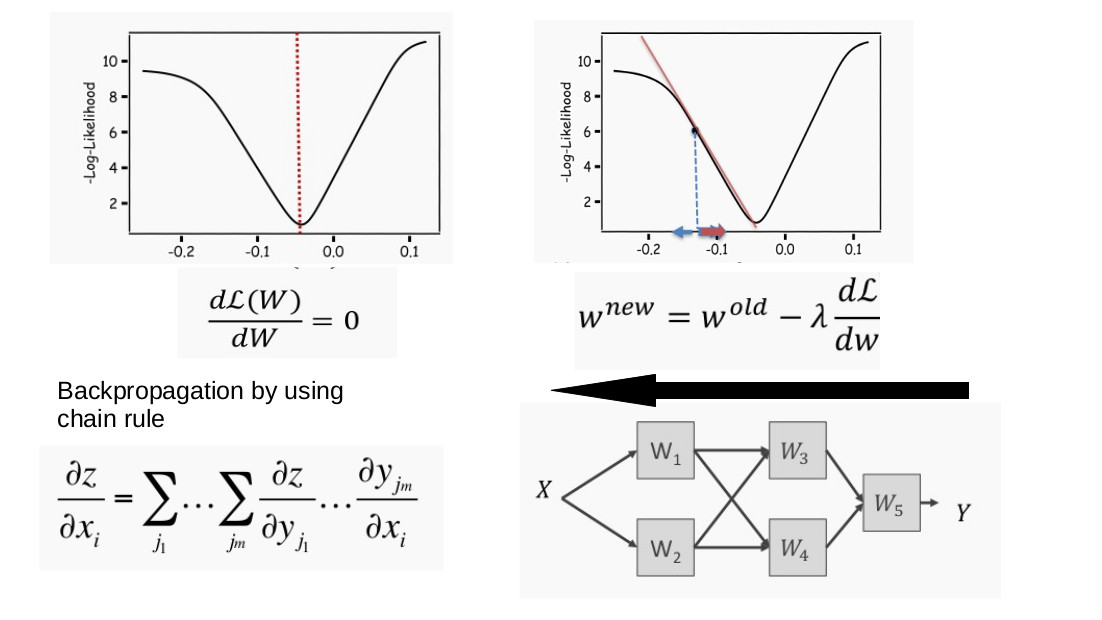

#### Baching, stochastic gradient descent, and epochs
Shufle and split the entire dataset in mini-batches help to escape from local minima


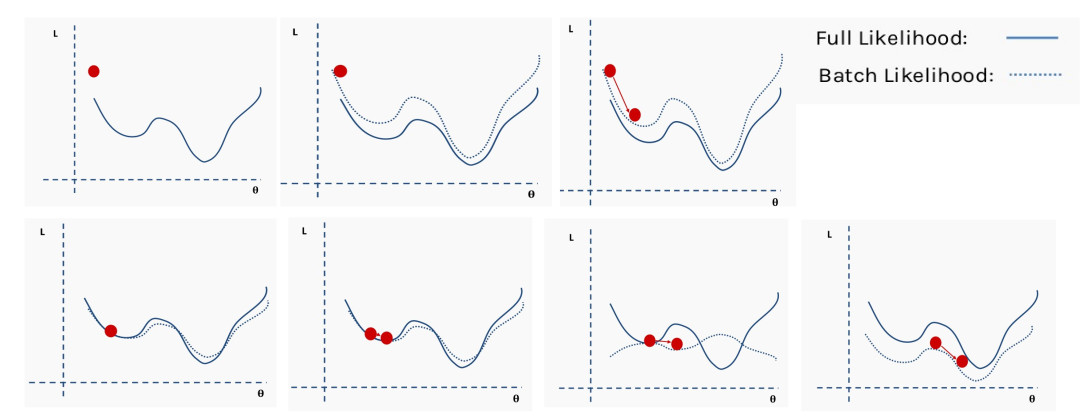

In [ ]:
model_t = models.Sequential(name='My_two_neurons_model_training')

# hidden layer with 2 neurons (or nodes)
model_t.add(layers.Dense(2, activation='relu', input_shape=(1,)))

# output layer, one neuron 
model_t.add(layers.Dense(1,  activation='linear'))

# model_t.summary()

## 3.3 Model Training and Monitoring
- Compile the Model
    - Use .compile() with:
        - Loss function (e.g., 'MSE')
        - Optimizer (e.g., SGD)
        - Optionally, metrics (e.g., 'mae', 'accuracy')

- Train the Model
    - Use .fit() to train the model for a given number of epochs and batch size.
    - Track training loss via the returned history object.

In [ ]:
sgd = optimizers.SGD(learning_rate = 0.01)
model_t.compile(loss='MSE',optimizer=sgd) 
history = model_t.fit(x_train2, y_train2, epochs=100, batch_size=16, verbose=0)

#### Plot training & validation loss values

In [ ]:
plt.plot(history.history['loss'],'b')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch');

#### Visualize the prediction

In [ ]:
y_model_t = model_t.predict(x_train2)

# plot the prediction and the ground truth
plt.plot(x_train2, y_train2,'.r',label='data')
plt.plot(x_train2, y_model_t,'b', label='FFNN' )
plt.legend()

# quantify your prediction
Loss_t = mseLoss(y_train2, y_model_t)
print('MSE Loss = ', Loss_t)


#### Check the parameters

In [ ]:
weights_t = model_t.get_weights()

print("TF weights:\n", weights_t)
print()
print("my weights:\n", weights)

#### Add more neurons and also take a look during the training

In [ ]:
model = models.Sequential(name='My_two_neurons_model_training')
# hidden layer with 2 neurons (or nodes)
model.add(layers.Dense(10, activation='relu', input_shape=(1,)))
# output layer, one neuron 
model.add(layers.Dense(1,  activation='linear'))

sgd = optimizers.SGD(learning_rate=0.01)
model.compile(loss='MSE',optimizer=sgd) 

def plotting(model_t, ax, title):
    y_model_t = model_t.predict(x_train2)
    # quantify your prediction
    # plot the prediction and the ground truth
    ax.plot(x_train2, y_train2,'.r',label='data')
    ax.plot(x_train2, y_model_t,'b', label='FFNN' )
    ax.legend()
    loss = mseLoss(y_train2, y_model_t)
    ax.set_title(title + ' - MSE Loss = ' + str(np.round(loss,5)))

f, ax = plt.subplots(2,3, figsize=(16,7.5))
ax = ax.ravel()
plotting(model, ax[0], 'Epoch 0')
for i in range(5):
    model.fit(x_train2, y_train2, epochs=100, batch_size=32, verbose=0)
    plotting(model, ax[i+1], 'Epoch '+str(100*(i+1)))

In [ ]:
model.summary()

### Let's fit something very nonlinear 

<div class="theme"><b>Exercise 3: </b>Feed-Forward Neural Network (FFNN) using the Keras.</div>

**Dataset**  
- Let's Load the file `toyDataSet_3.csv` from the `/data` directory into a DataFrame named `toySet_3`.  
- And extract the `x` and `y` columns into `x_train3` and `y_train3`, reshaped to 2D arrays.
- Complete following sub-exercises in order to complete `exercise 3`.

In [ ]:
toySet_3 = pd.read_csv('data/toyDataSet_3.csv')

x_train3 = toySet_3['x'].values.reshape(-1,1)
y_train3 = toySet_3['y'].values.reshape(-1,1)

In [ ]:
plt.plot(x_train3, y_train3,'or');

<div class="exercise"><b>Exercise 3.1 : </b>Design a Feed-Forward Neural Network (FFNN) using the Keras Sequential API. </div>

1. **Build the FFNN Architecture** 
    - Create a sequential model named `'MyNet'` and store it to `model`.
2. **Add the following layers:**
   - First hidden layer with **20 neurons** and `'tanh'` activation.
   - Second hidden layer with **20 neurons** and `'tanh'` activation.
   - Output layer with **1 neuron** and `'linear'` activation.
3. **Compile the model using:**
   - Optimizer: `SGD` with a learning rate of **0.02**
   - Loss function: `'MSE'`


In [ ]:
"""Your code for exercise 3.1 here:"""

# your code here
raise NotImplementedError

In [ ]:
####################################
###✅🔒 Hidden tests here ✅🔒### 
###################################

<div class="exercise"><b>Exercise 3.2: Train the Model and Plot Training loss</b></div>

1. Train the model you defined in `Exercise 3.1` using the nonlinear dataset `toyDataSet_3.csv`. 

2. Train the model using `.fit()`:
   - Use `x_train3` and `y_train3`
   - **epochs** = 1000
   - **batch_size** = 16
   - **verbose** = 0
3. Store the training history in a variable named `history`.
4. Plot the training loss using a **log-log** scale.


In [ ]:
"""Your code for exercise 3.2 here:"""

# your code here
raise NotImplementedError

In [ ]:
####################################
###✅🔒 Hidden tests here ✅🔒### 
###################################

<div class="exercise"><b>Exercise 3.3: Predict and Plot Model Output</b></div>

Use the trained model to make predictions on the training data and visualize the results.

1. Predict the outputs using `model.predict(x_train3)` and store them in `y_model`.
2. Plot:
   - Ground truth (`x_train3`, `y_train3`) as red dots.
   - Model predictions (`x_train3`, `y_model`) as a blue line.
3. Compute the **Mean Squared Error (MSE)** using the `mseLoss()` function and store it in `Loss_t`.
4. Print the MSE value.


In [ ]:
"""Your code for exercise 3.3 here:"""

# your code here
raise NotImplementedError

In [ ]:
####################################
###✅🔒 Hidden tests here ✅🔒### 
###################################

## Conclusion: Feed-Forward Neural Networks (FFNNs)

In this lab, we explored the foundational concepts and practical implementation of **Feed-Forward Neural Networks (FFNNs)** for regression tasks.

------

- **FFNN Architecture**: We reviewed the basic structure of an FFNN, including input, hidden, and output layers, and the sequence of affine and nonlinear (activation) operations.

- **Manual Forward Pass**: We implemented a forward pass manually, gaining a deeper understanding of how weights, biases, and activation functions interact.

- **Loss Functions**: We used the **Mean Squared Error (MSE)** loss to quantify how well your network fits the data.

- **General Forward Pass Function**: We built a general FFNN function capable of handling an arbitrary number of neurons in a hidden layer.

- **Keras Modeling**:
  - We replicated our manual FFNN using the **Keras Sequential API**.
  - Manually initialized weights to match previous models.
  - Trained models using **backpropagation** with gradient descent.
  - Observed the role of **learning rate**, **batch size**, and **epochs** in model training.

- **Modeling Nonlinear Data**:
  - We built a **deep network** with multiple hidden layers using the `tanh` activation function.
  - Trained the network on a complex dataset and visualized both training loss and predictions.

---

In upcoming labs, we will explore more advanced architectures like **Convolutional Neural Networks (CNNs)** and **Recurrent Neural Networks (RNNs)**.

----------

## End of Lab

----------